In [9]:
import pandas as pd

x_feats = ['variance', 'skewness', 'curtosis', 'entropy']
all_cols = x_feats + ['target']
df = pd.read_csv('data/data_banknote_authentication.csv')
df.columns = all_cols
df.head()

,variance,skewness,curtosis,entropy,target
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


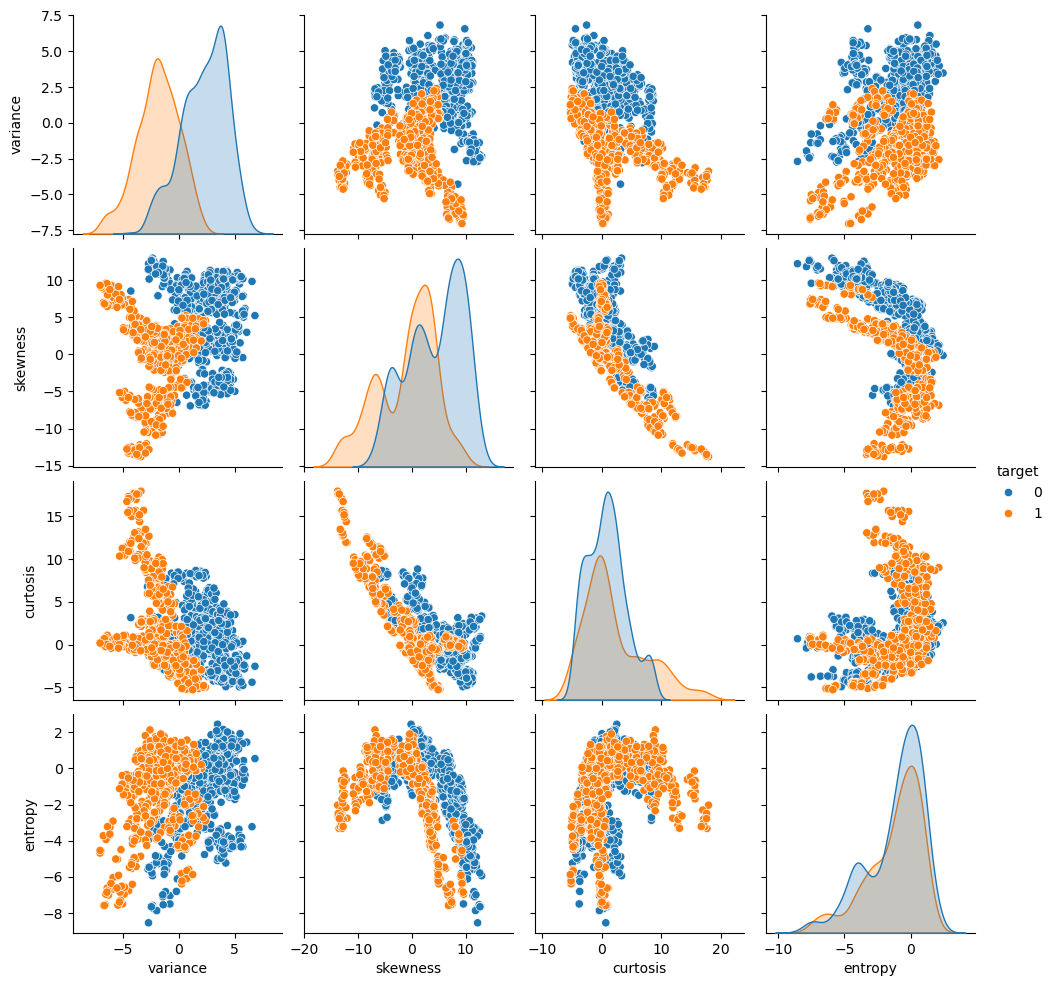

In [8]:
import seaborn as sns

sns.pairplot(df, hue='target')

It seems skewness and variance have the highest degree of class separation

In [10]:
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import train_test_split

XTrain, XTest, YTrain, YTest = train_test_split(df[x_feats], df['target'], random_state=1, test_size=0.3)

selector = SelectPercentile(f_classif)
p_values = selector.fit_transform(XTrain, YTrain)

for feat, p in zip(x_feats, p_values):
    print(feat, p)

variance [-1.6988]
skewness [-0.77688]
curtosis [-1.3414]
entropy [-0.17296]


In [14]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

feature_sets = {
    "a": ['variance'],
    "b": ['variance', 'skewness'],
    "c": x_feats,
}
#
# models = {}
for name, feats in feature_sets.items():
    print(f"\nMODEL: {feats}")
    svm_clf = SVC(kernel='linear', random_state=1)
    print(cross_val_score(svm_clf, XTrain, YTrain, cv=10, scoring='accuracy'))




MODEL: ['variance']
[0.97916667 1.         0.98958333 0.98958333 1.         1.
 0.98958333 1.         0.96875    0.96842105]

MODEL: ['variance', 'skewness']
[0.97916667 1.         0.98958333 0.98958333 1.         1.
 0.98958333 1.         0.96875    0.96842105]

MODEL: ['variance', 'skewness', 'curtosis', 'entropy']
[0.97916667 1.         0.98958333 0.98958333 1.         1.
 0.98958333 1.         0.96875    0.96842105]
